# L1 and L2 Regularization

This notebook includes some practice and experiments related to L1 and L2 Regularization

## Setup
Create synthetic linear regression data so we can control things like noise and feature importance

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Seed for reproducibility
np.random.seed(42)

# Create synthetic data
n_samples, n_features = 100, 10
X = np.random.randn(n_samples, n_features)

# Only first 3 features are actually relevant
true_coefs = np.array([3, -2, 1] + [0]*(n_features-3))
y = X @ true_coefs + np.random.randn(n_samples) * 0.5  # Add noise

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardize features for better regularization behavior
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Visualizing L1 vs L2 Penalty on Coefficients
how weights shrink differently with L1 and L2.

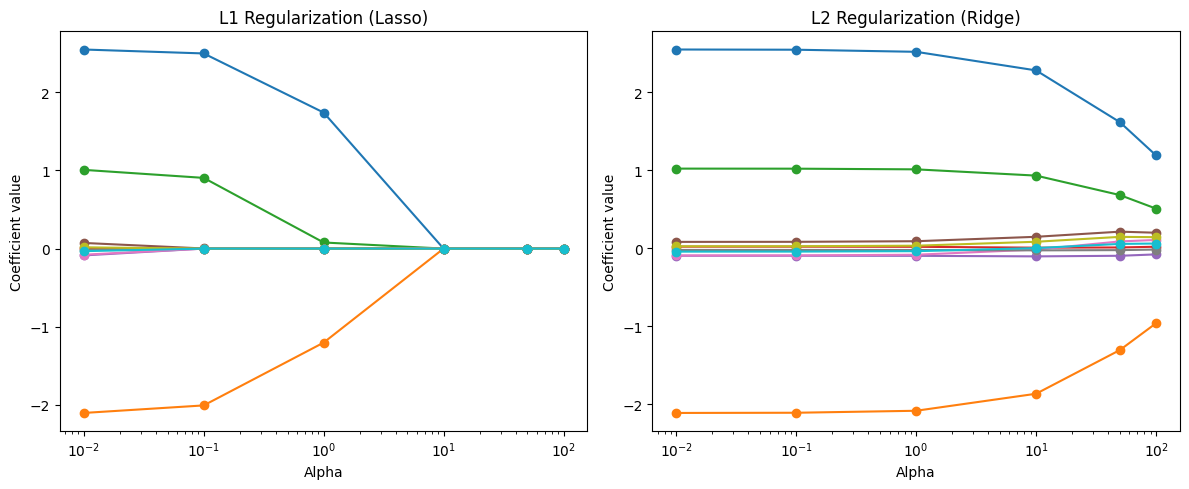

In [2]:
alphas = [0.01, 0.1, 1, 10, 50, 100]  # Regularization strengths
coefs_l1 = []
coefs_l2 = []

for a in alphas:
    lasso = Lasso(alpha=a, max_iter=5000)
    lasso.fit(X_train_scaled, y_train)
    coefs_l1.append(lasso.coef_)

    ridge = Ridge(alpha=a)
    ridge.fit(X_train_scaled, y_train)
    coefs_l2.append(ridge.coef_)

coefs_l1 = np.array(coefs_l1)
coefs_l2 = np.array(coefs_l2)

# Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for i in range(n_features):
    plt.plot(alphas, coefs_l1[:, i], marker='o', label=f'Feature {i}')
plt.xscale('log')
plt.title("L1 Regularization (Lasso)")
plt.xlabel("Alpha")
plt.ylabel("Coefficient value")

plt.subplot(1, 2, 2)
for i in range(n_features):
    plt.plot(alphas, coefs_l2[:, i], marker='o', label=f'Feature {i}')
plt.xscale('log')
plt.title("L2 Regularization (Ridge)")
plt.xlabel("Alpha")
plt.ylabel("Coefficient value")

plt.tight_layout()
plt.show()


## Experiment: Bias-Variance Tradeoff
compare train vs test error for different regularization strengths

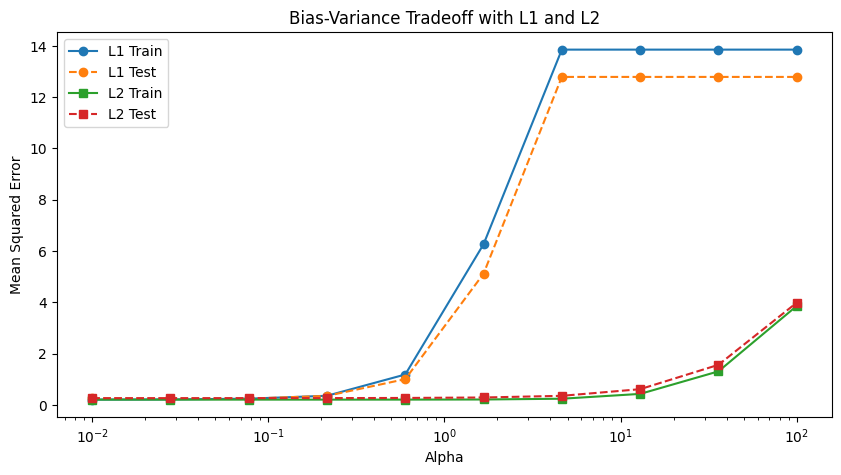

In [3]:
alphas = np.logspace(-2, 2, 10)
train_errors_l1, test_errors_l1 = [], []
train_errors_l2, test_errors_l2 = [], []

for a in alphas:
    # Lasso
    lasso = Lasso(alpha=a, max_iter=5000)
    lasso.fit(X_train_scaled, y_train)
    train_errors_l1.append(np.mean((lasso.predict(X_train_scaled) - y_train)**2))
    test_errors_l1.append(np.mean((lasso.predict(X_test_scaled) - y_test)**2))
    
    # Ridge
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_scaled, y_train)
    train_errors_l2.append(np.mean((ridge.predict(X_train_scaled) - y_train)**2))
    test_errors_l2.append(np.mean((ridge.predict(X_test_scaled) - y_test)**2))

plt.figure(figsize=(10,5))
plt.plot(alphas, train_errors_l1, 'o-', label='L1 Train')
plt.plot(alphas, test_errors_l1, 'o--', label='L1 Test')
plt.plot(alphas, train_errors_l2, 's-', label='L2 Train')
plt.plot(alphas, test_errors_l2, 's--', label='L2 Test')
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("Mean Squared Error")
plt.title("Bias-Variance Tradeoff with L1 and L2")
plt.legend()
plt.show()


## Experiment: Coefficient Sparsity
how many coefficients are non-zero in Lasso as alpha increases

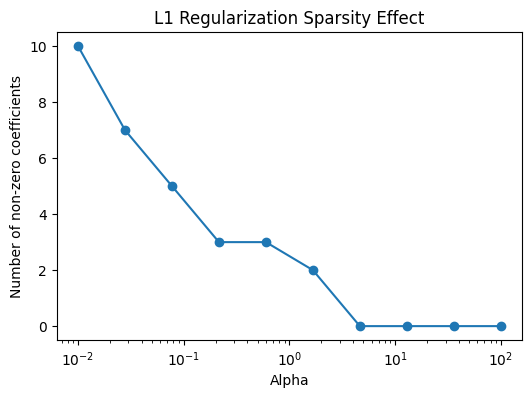

In [4]:
non_zero_counts = [np.sum(Lasso(alpha=a, max_iter=5000).fit(X_train_scaled, y_train).coef_ != 0) for a in alphas]

plt.figure(figsize=(6,4))
plt.plot(alphas, non_zero_counts, 'o-')
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("Number of non-zero coefficients")
plt.title("L1 Regularization Sparsity Effect")
plt.show()


## Experiment: Bias-Variance Tradeoff again
Add more noise to data to see the real result on plots

To notice:
 - Low alpha → low bias, high variance → train error small, test error can be higher.
 - High alpha → high bias, low variance → train error increases, test error might decrease initially but then rises.
 - L1 can give sparse solutions, potentially better for feature selection.

Regularization effect:
 - Low alpha → weak regularization → model can overfit → low bias, high variance
 - High alpha → strong regularization → model underfits → high bias, low variance

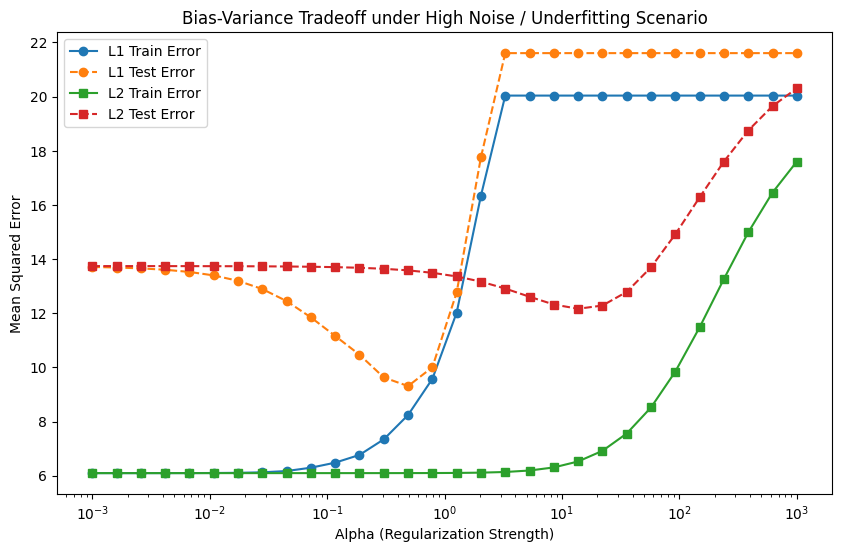

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

# High noise and more features to make underfitting obvious
n_samples, n_features = 100, 20  # fewer samples, more features
X = np.random.randn(n_samples, n_features)

# Only first 3 features are relevant
true_coefs = np.array([3, -2, 1] + [0]*(n_features-3))
y = X @ true_coefs + np.random.randn(n_samples) * 3.0  # High noise!

# Split & scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Range of alphas
alphas = np.logspace(-3, 3, 30)

train_errors_l1, test_errors_l1 = [], []
train_errors_l2, test_errors_l2 = [], []

for a in alphas:
    # L1 (Lasso)
    lasso = Lasso(alpha=a, max_iter=5000)
    lasso.fit(X_train_scaled, y_train)
    train_errors_l1.append(np.mean((lasso.predict(X_train_scaled) - y_train)**2))
    test_errors_l1.append(np.mean((lasso.predict(X_test_scaled) - y_test)**2))
    
    # L2 (Ridge)
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_scaled, y_train)
    train_errors_l2.append(np.mean((ridge.predict(X_train_scaled) - y_train)**2))
    test_errors_l2.append(np.mean((ridge.predict(X_test_scaled) - y_test)**2))

# Plot
plt.figure(figsize=(10,6))
plt.plot(alphas, train_errors_l1, 'o-', label='L1 Train Error')
plt.plot(alphas, test_errors_l1, 'o--', label='L1 Test Error')
plt.plot(alphas, train_errors_l2, 's-', label='L2 Train Error')
plt.plot(alphas, test_errors_l2, 's--', label='L2 Test Error')
plt.xscale('log')
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("Mean Squared Error")
plt.title("Bias-Variance Tradeoff under High Noise / Underfitting Scenario")
plt.legend()
plt.show()


## When Ridge is better ?
Ridge works better when:
 - Most features are informative (not sparse).
 - There is multicollinearity (features are correlated).
 - Noise exists, but you don’t want to zero out coefficients.

In contrast, L1 excels when the true model is sparse, i.e., only a few features matter.

In [6]:
# Create a dataset where all features are relevant and correlated
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

# Parameters
n_samples, n_features = 100, 10

# Generate correlated features
X_base = np.random.randn(n_samples, 1)
X = np.hstack([X_base + 0.1*np.random.randn(n_samples,1) for _ in range(n_features)])

# True coefficients: all features are relevant
true_coefs = np.linspace(1, 2, n_features)  # Gradually increasing
y = X @ true_coefs + np.random.randn(n_samples) * 0.5  # Add some noise

# Split & scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


MSE Lasso: 1.009
MSE Ridge: 0.405


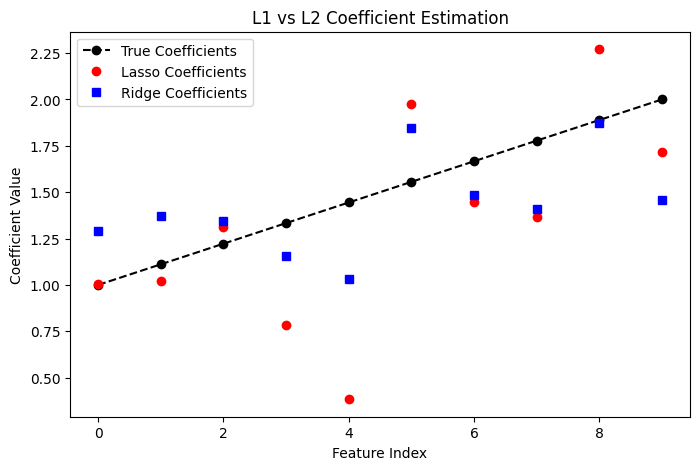

In [7]:
# Train Ridge vs Lasso
alpha = 1.0  # Regularization strength

# Lasso
lasso = Lasso(alpha=alpha, max_iter=5000)
lasso.fit(X_train_scaled, y_train)
y_pred_l1 = lasso.predict(X_test_scaled)
mse_l1 = np.mean((y_test - y_pred_l1)**2)

# Ridge
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_scaled, y_train)
y_pred_l2 = ridge.predict(X_test_scaled)
mse_l2 = np.mean((y_test - y_pred_l2)**2)

print(f"MSE Lasso: {mse_l1:.3f}")
print(f"MSE Ridge: {mse_l2:.3f}")

# Compare coefficients
plt.figure(figsize=(8,5))
plt.plot(true_coefs, 'k--', marker='o', label='True Coefficients')
plt.plot(lasso.coef_, 'ro', label='Lasso Coefficients')
plt.plot(ridge.coef_, 'bs', label='Ridge Coefficients')
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("L1 vs L2 Coefficient Estimation")
plt.legend()
plt.show()
